In [5]:
import os
import re
import SMBcorr
import h5py
import numpy as np
import pointCollection as pc
import ipywidgets as widgets
import matplotlib.pyplot as plt
import netCDF4 as nc
%matplotlib notebook

In [6]:
thedir='/Volumes/ice1/tyler/MERRA2_hybrid/v1/'
thefile=thedir+'gsfc_fdm_v1_gris.nc'

In [7]:
ds=nc.Dataset(thefile,'r')
print(ds['time'][-1])

2019.9930936073056


<IPython.core.display.Javascript object>


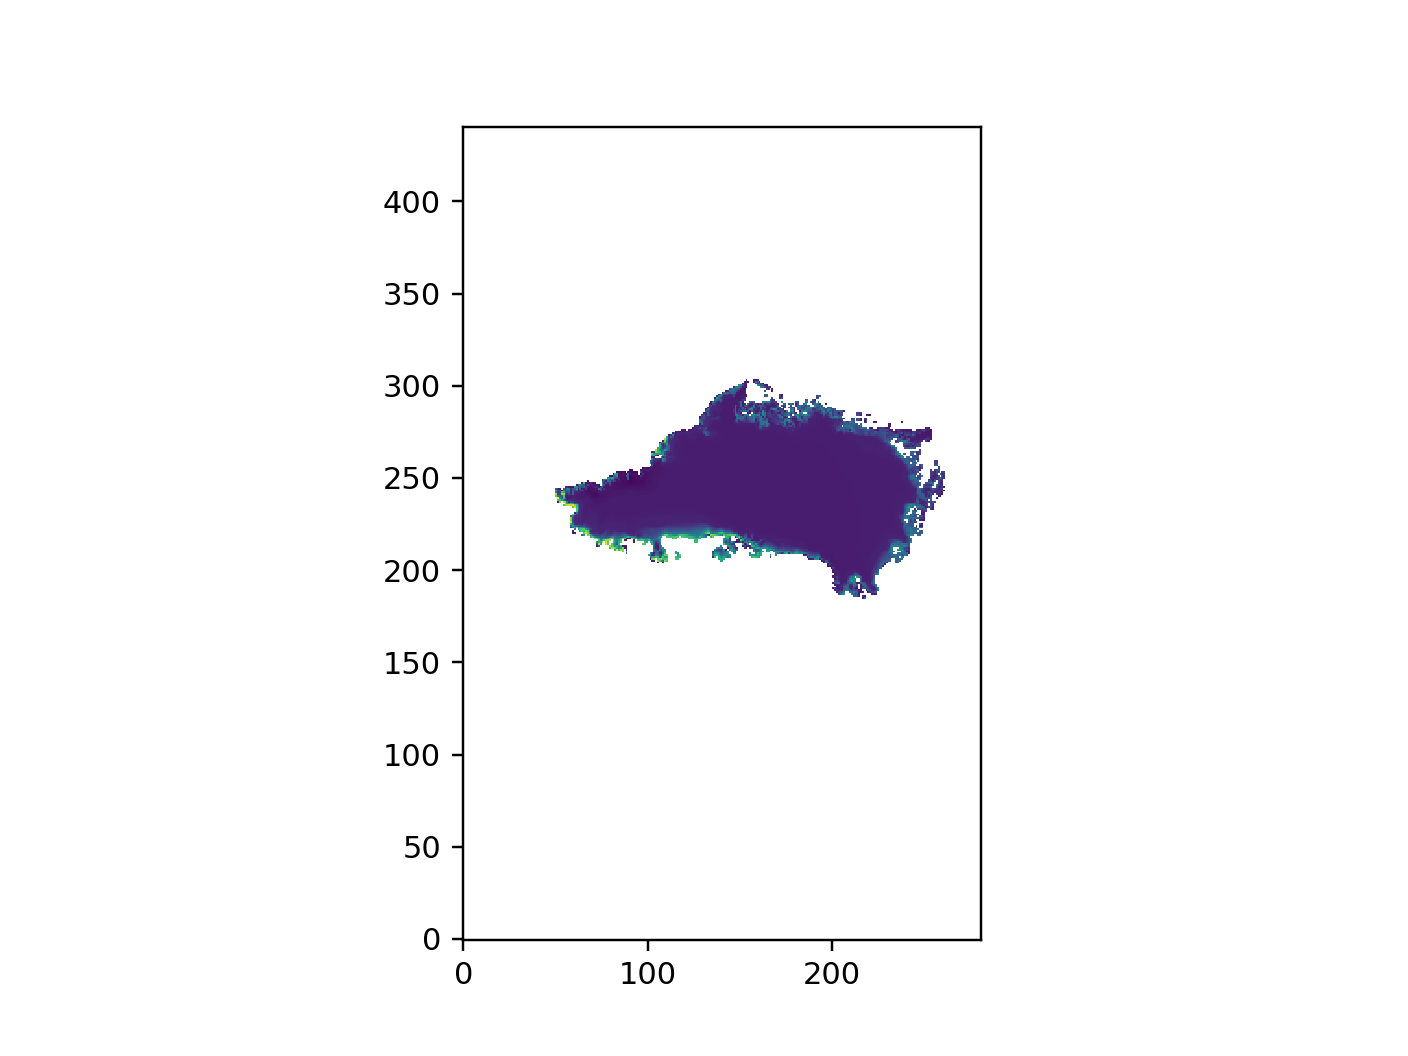

In [8]:
temp=np.array(ds['y'])
temp=np.array(ds['cum_smb_anomaly'][0,:,:])
temp1=np.array(ds['cum_smb_anomaly'][-1,:,:])
temp[temp<=-9999]=np.NaN
temp1[temp1<=-9999]=np.NaN
#plt.figure(1); plt.clf()
plt.imshow(temp-temp1, origin='lower')
#! ls /Volumes/ice1/tyler/MERRA2_hybrid/v1/

<IPython.core.display.Javascript object>


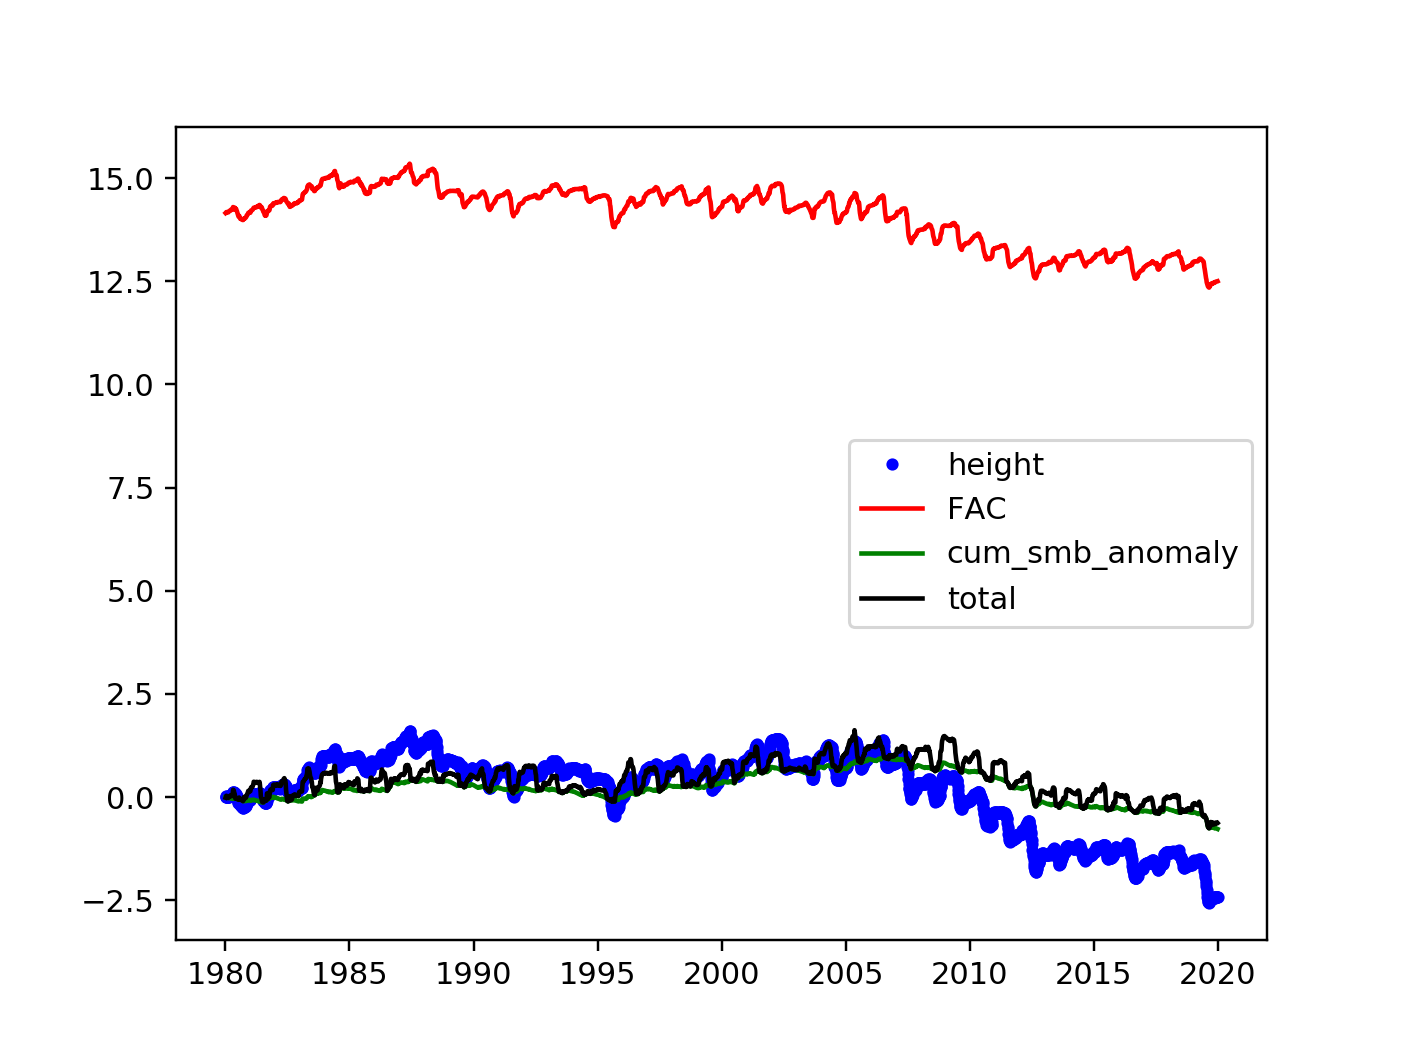

In [9]:
plt.figure(); 
r=222+10
c=123
plt.plot(ds['time'], ds['height'][:, r, c],'b.', label='height')
plt.plot(ds['time'], ds['FAC'][:, r, c],'r', label='FAC')
plt.plot(ds['time'], ds['cum_smb_anomaly'][:, r, c],'g', label='cum_smb_anomaly')
plt.plot(ds['time'], ds['cum_smb_anomaly'][:, r, c]+ds['FAC'][:, 222, 123],'k', label='total')
plt.legend()


In [6]:
ii=np.min((np.array(ds['time'])>1996).nonzero())
ii

1169

<IPython.core.display.Javascript object>


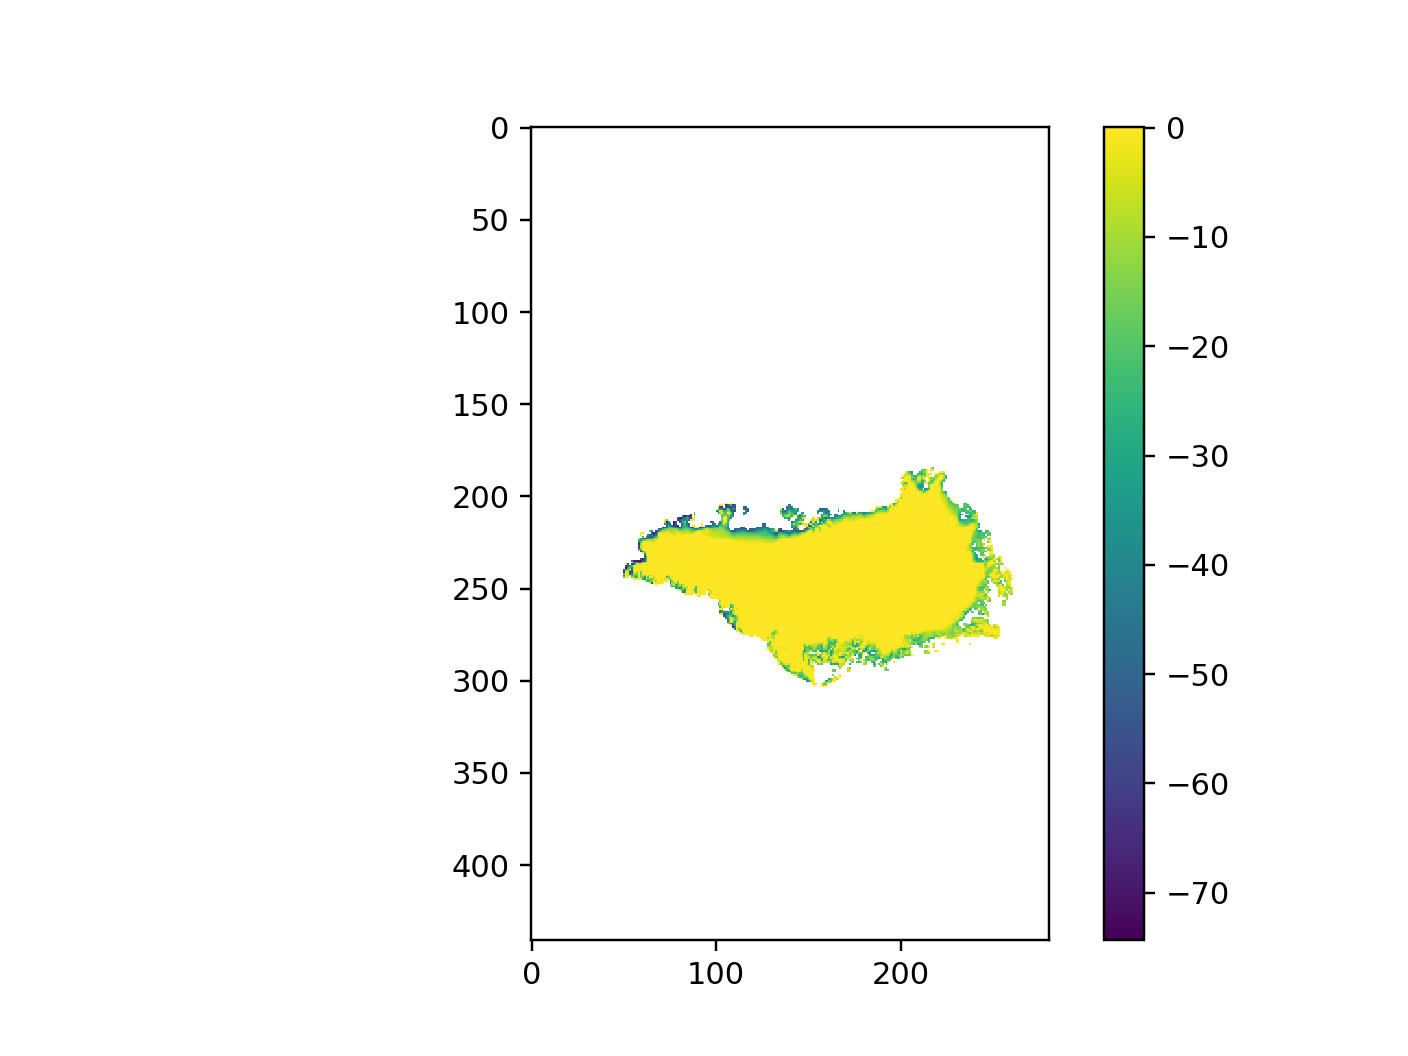

In [10]:
plt.figure(); plt.imshow((ds['cum_smb_anomaly'][1169, :,:]-ds['cum_smb_anomaly'][0])); plt.colorbar()

array([-2940690.45933937, -2928190.45933937, -2915690.45933937,
       -2903190.45933937, -2890690.45933937, -2878190.45933937,
       -2865690.45933937, -2853190.45933937, -2840690.45933937,
       -2828190.45933937, -2815690.45933937, -2803190.45933937,
       -2790690.45933937, -2778190.45933937, -2765690.45933937,
       -2753190.45933937, -2740690.45933937, -2728190.45933937,
       -2715690.45933937, -2703190.45933937, -2690690.45933937,
       -2678190.45933937, -2665690.45933937, -2653190.45933937,
       -2640690.45933937, -2628190.45933937, -2615690.45933937,
       -2603190.45933937, -2590690.45933937, -2578190.45933937,
       -2565690.45933937, -2553190.45933937, -2540690.45933937,
       -2528190.45933937, -2515690.45933937, -2503190.45933937,
       -2490690.45933937, -2478190.45933937, -2465690.45933937,
       -2453190.45933937, -2440690.45933937, -2428190.45933937,
       -2415690.45933937, -2403190.45933937, -2390690.45933937,
       -2378190.45933937, -2365690.45933

In [12]:
# PURPOSE: convert time from delta seconds into Julian and year-decimal
def convert_delta_time(delta_time, gps_epoch=1198800018.0):
    # calculate gps time from delta_time
    gps_seconds = gps_epoch + delta_time
    time_leaps = SMBcorr.count_leap_seconds(gps_seconds)
    # calculate julian time
    time_julian = 2444244.5 + (gps_seconds - time_leaps)/86400.0
    # convert to calendar date with convert_julian.py
    Y,M,D,h,m,s = SMBcorr.convert_julian(time_julian,FORMAT='tuple')
    # calculate year-decimal time
    time_decimal = SMBcorr.convert_calendar_decimal(Y,M,DAY=D,HOUR=h,MINUTE=m,SECOND=s)
    # return both the Julian and year-decimal formatted dates
    return dict(julian=time_julian, decimal=time_decimal)

In [ ]:
delta_time=np.arange(0, 2*365.25*24*3600, 3600*24)

tdec = convert_delta_time(delta_time)['decimal'][:,np.newaxis]

x0=-27000+np.arange(-6.e4, 8.e4, 2.e4)[np.newaxis,:]
y0=-2490500+np.zeros_like(x0)

x=x0+np.zeros_like(tdec)
y=y0+np.zeros_like(tdec)
t=tdec+np.zeros_like(x0)

height = SMBcorr.interpolate_merra_hybrid(thedir, 'EPSG:3413',
                'gris', t.ravel(), x.ravel(), y.ravel(),
                VERSION='v1', VARIABLE='height',
                SIGMA=1.5, FILL_VALUE=np.nan).reshape(x.shape)


In [ ]:
plt.figure(); 
for col in range(x.shape[1]):
    plt.plot(tdec, height[:,col], label=f'x0={x0[0][col]/1000}km')
plt.legend()
plt.title(f'y={y0[0,0]/1000}km')

In [ ]:

x0[0][col]

In [ ]:
x.shape

In [10]:

DS=nc.Dataset('/Volumes/ice2/ben/MAR/MAR_SMBavg_10km_1980-1996.nc')
#xx=np.array(DS['x'])
#yy=np.array(DS['y'])

print(DS)



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): X10_153(144), Y21_288(268)
    variables(dimensions): float64 X10_153(X10_153), float64 Y21_288(Y21_288), float64 LON(Y21_288,X10_153), float64 LAT(Y21_288,X10_153), float64 SH(Y21_288,X10_153), float64 MSK(Y21_288,X10_153), float64 SMB(Y21_288,X10_153)
    groups: 



<IPython.core.display.Javascript object>


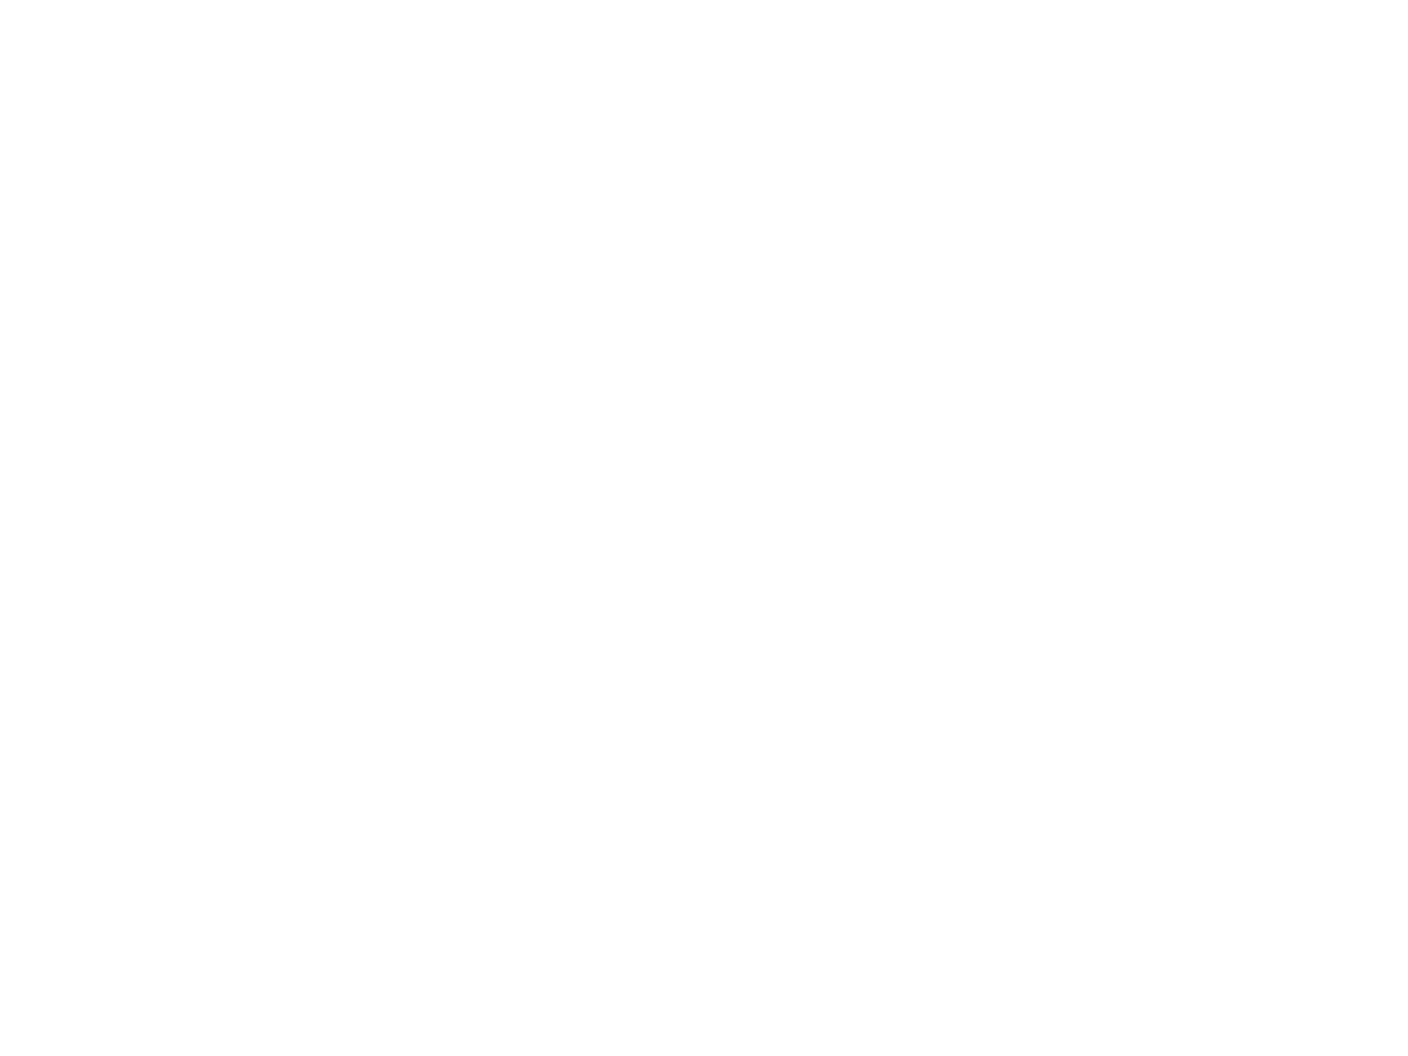

NameError: name 'DS' is not defined

In [4]:
plt.figure(); plt.imshow(DS['SMB'], origin='lower')